# **EDA**

**Three Questions Based on The Data Source**

1. Which genres show up most in this list? (dummumy variable) 
2. Which years were the most productive and made the highest rating movie?
3. What are people's tag preferences?

 **Import Data**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving tags.csv to tags.csv


In [ ]:
from pandas.core.internals.managers import Index
from pickle import TRUE
import pandas as pd
import io

In [ ]:
#movies = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
movies = pd.read_csv('movies.csv')
movies.head(10)
#print(len(movies)) #9742

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [ ]:
#ratings = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))
ratings.head(10)
#print(len(ratings)) #100836
### Each line of this file after the header row represents one rating of one movie by one user

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [ ]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
#tags = pd.read_csv(io.BytesIO(uploaded['tags.csv']))
tags.head(10)
#print(len(tags)) #3683
### Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [ ]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

**Question 1**

In [ ]:
#separate title into movie and publish year
movies['movie_name'] = movies['title'].str[:-6]
movies['publish_year'] = movies['title'].str[-6:]
movies['publish_year'] = movies['publish_year'].str.replace(')', '')
movies['publish_year'] = movies['publish_year'].str.replace('(', '')
movies.drop(columns=['title'],axis=1,inplace=True)
movies.head(10)


<ipython-input-113-a3d3cb6b65f9>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['publish_year'] = movies['publish_year'].str.replace(')', '')
<ipython-input-113-a3d3cb6b65f9>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['publish_year'] = movies['publish_year'].str.replace('(', '')


,movieId,genres,movie_name,publish_year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
5,6,Action|Crime|Thriller,Heat,1995
6,7,Comedy|Romance,Sabrina,1995
7,8,Adventure|Children,Tom and Huck,1995
8,9,Action,Sudden Death,1995
9,10,Action|Adventure|Thriller,GoldenEye,1995


In [ ]:
#Create Dummy variables for genres columns
movies_dummy = movies['genres'].str.get_dummies(sep='|')
#movies_dummy.head(10)
counts = []
for col in movies_dummy.columns:
    tmp_series = movies_dummy[col].value_counts()
    tmp_series.name = col
    counts.append(tmp_series)
df_value_counts = pd.concat(counts, axis=1)
#df_value_counts.head()
df_value_counts_trans = df_value_counts.T
df_value_counts_trans.rename(columns = {df_value_counts_trans.columns[0]:'no_exist', df_value_counts_trans.columns[1]:'exist'}, inplace = True)
df_value_counts_trans = df_value_counts_trans.sort_values(by='exist')
df_value_counts_trans.reset_index(inplace=True)
df_value_counts_trans = df_value_counts_trans.rename(columns = {'index':'genres'})
df_value_counts_trans.head(10)

,genres,no_exist,exist
0,(no genres listed),9708,34
1,Film-Noir,9655,87
2,IMAX,9584,158
3,Western,9575,167
4,Musical,9408,334
5,War,9360,382
6,Documentary,9302,440
7,Mystery,9169,573
8,Animation,9131,611
9,Children,9078,664


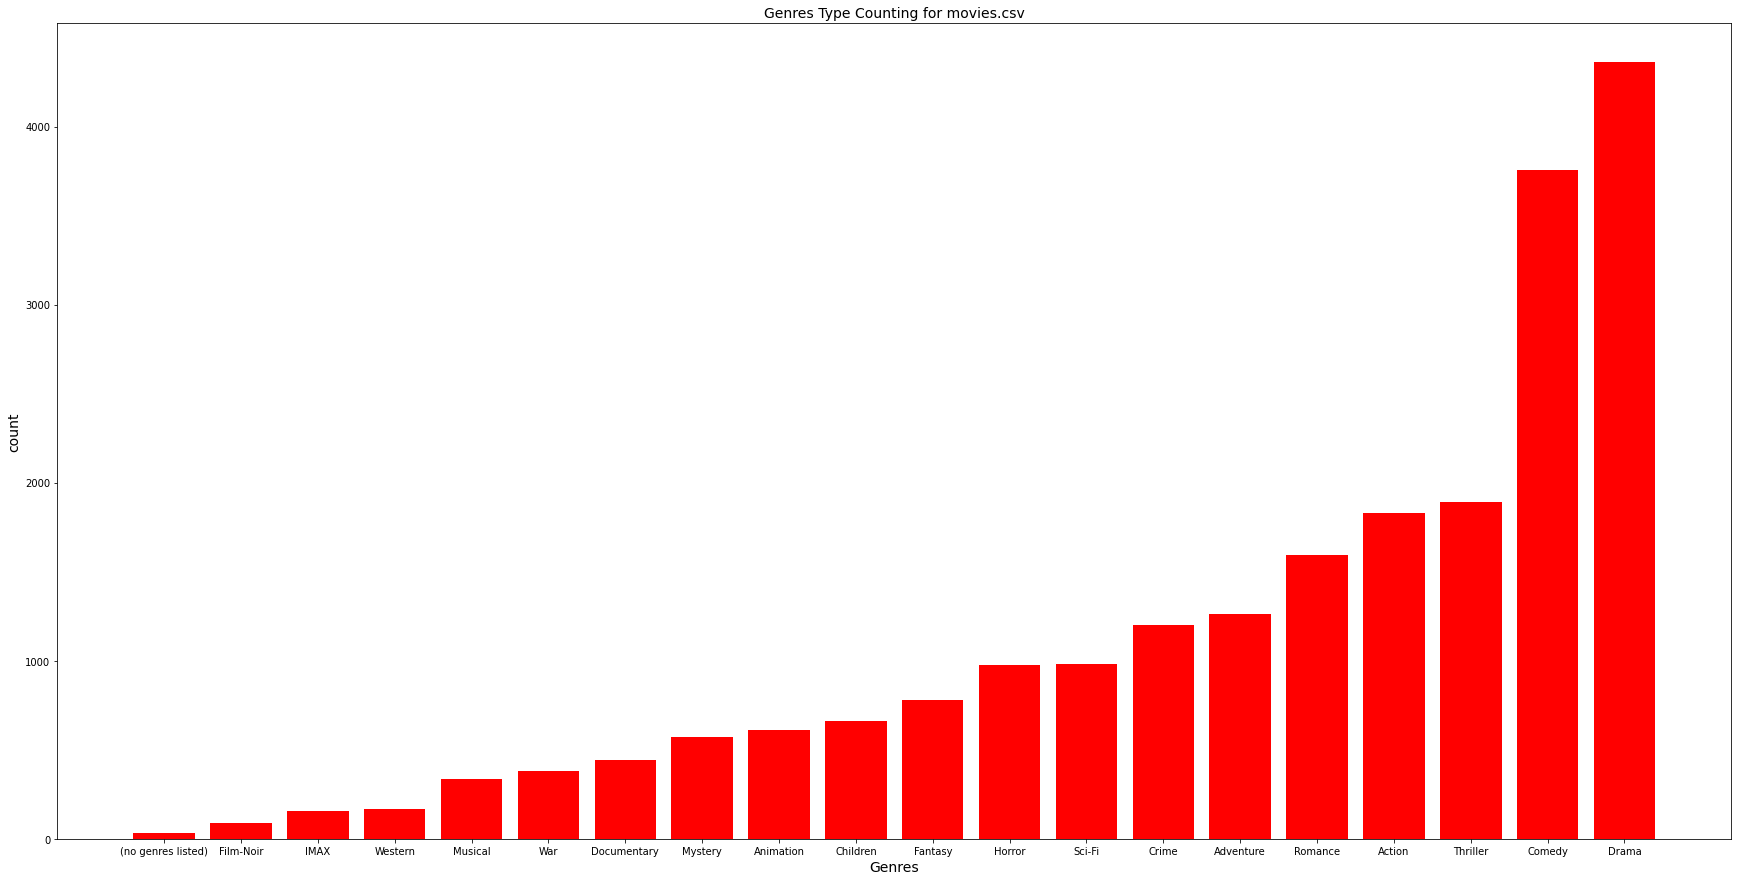

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.bar(df_value_counts_trans.genres,df_value_counts_trans.exist,color='r')
plt.title('Genres Type Counting for movies.csv', fontsize=14)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

Question 2

In [ ]:
result1 = pd.merge(movies, ratings, how="outer", on="movieId")
result1.head()
#print(result1)


,movieId,genres,movie_name,publish_year,userId,rating,timestamp
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,1.0,4.0,9.649827e+08
1,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,5.0,4.0,8.474350e+08
2,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,7.0,4.5,1.106636e+09
3,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,15.0,2.5,1.510578e+09
4,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,17.0,4.5,1.305696e+09


In [ ]:
result1.dtypes

movieId           int64
genres           object
movie_name       object
publish_year     object
userId          float64
rating          float64
timestamp       float64
dtype: object

In [ ]:
#result1.groupby(['movie_name', 'publish_year'])['rating'].mean().sort_values(by='rating')
result1['avg_result'] = result1.groupby(['movie_name', 'publish_year'])['rating'].transform('mean')
result1 = result1.sort_values(by=['avg_result'], ascending=False)
result1.head(20)
#The Top 20 highest rating movies

,movieId,genres,movie_name,publish_year,userId,rating,timestamp,avg_result
55501,3567,Comedy|Drama|Romance,Bossa Nova,2000,333.0,5.0,9.656717e+08,5.0
99480,143511,Documentary,Human,2015,105.0,5.0,1.526207e+09,5.0
4051,148,Drama,"Awfully Big Adventure, An",1995,191.0,5.0,8.297609e+08,5.0
98902,134796,Documentary,Bitter Lake,2015,318.0,5.0,1.446925e+09,5.0
98904,134847,Comedy,Ghost Graduation,2012,89.0,5.0,1.520409e+09,5.0
99092,136341,Animation|Children|Comedy,Scooby-Doo! and the Samurai Sword,2009,89.0,5.0,1.520409e+09,5.0
99093,136353,Animation|Children|Comedy,Scooby-Doo! and the Loch Ness Monster,2004,89.0,5.0,1.520409e+09,5.0
99094,136355,Animation|Children|Comedy,Big Top Scooby-Doo!,2012,89.0,5.0,1.520409e+09,5.0
99095,136359,Animation|Children|Comedy,Scooby-Doo Goes Hollywood,1979,89.0,5.0,1.520409e+09,5.0
99097,136445,Comedy,George Carlin: Back in Town,1996,105.0,5.0,1.526207e+09,5.0


In [ ]:
#The most productive 10 years in movie industry
productive_year = movies.groupby(['publish_year']).size().reset_index(name='count_by_year')
productive_year = productive_year.sort_values(by='count_by_year', ascending=False)
productive_year.head(10)

,publish_year,count_by_year
93,2002,311
97,2006,295
92,2001,294
91,2000,283
102,2009,282
98,2007,282
95,2004,279
94,2003,279
109,2014,277
85,1996,276


In [ ]:
#Top 10 years made the most popular moview
popupar_year = result1.groupby(['publish_year']).size().reset_index(name='count_by_year')
popupar_year = popupar_year.sort_values(by='count_by_year', ascending=False)
popupar_year.head(10)

,publish_year,count_by_year
83,1995,6143
82,1994,5296
89,1999,4537
85,1996,4509
91,2000,4268
92,2001,3914
81,1993,3741
86,1997,3643
93,2002,3642
87,1998,3556


Question 3

In [ ]:
#import seaborn as sns #statist graph package
#import matplotlib.pyplot as plt #plot package

import wordcloud 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 1599.5, 799.5, -0.5)

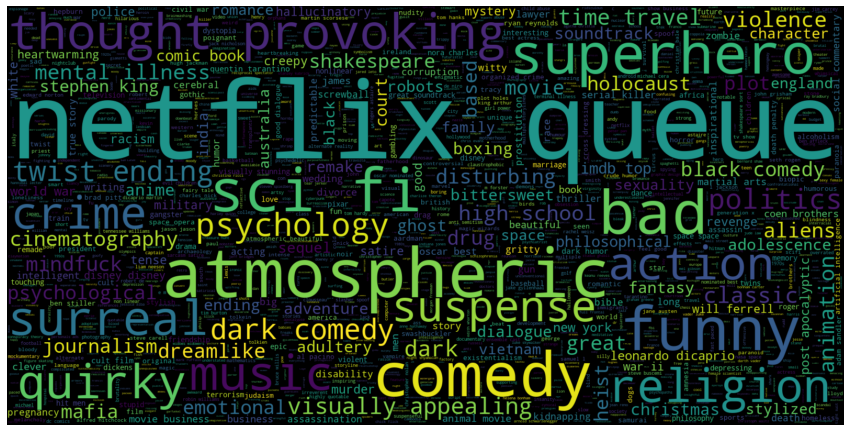

In [ ]:
tags["tag"] = tags["tag"].fillna(value="") #remove NULL values first
word_string=" ".join(tags["tag"].str.lower()) #add a string value instead to make our Series clean

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="black", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

(-0.5, 1599.5, 799.5, -0.5)

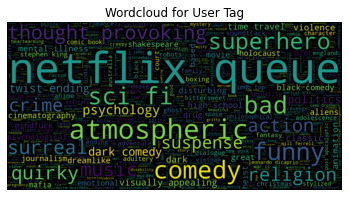

In [ ]:
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.title('Wordcloud for User Tag')
plt.axis('off')